Análisis exploratorio de datos
============================

Unidad 3-4 - Parte práctica
-----------------------------------------------------

### Ejercicio 1

En este ejercicio vamos a trabajar con el dataset `Coursera.csv` de las unidades 1 y 2. Ahora que ya sabemos cómo trabajar con los datos nulos y anómalos, vamos a corregirlos.

a) Primer de todo, carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 3 primeras filas.


b) Resuelve los valores nulos/anómalos en los datos para responder las preguntas siguientes:

- ¿Cuál es el valor máximo/mínimo de reviews? ¿Y en qué curso se encuentra?

  1) Corrige los valores anómalos.

  2) Muestra los estadísticos básicos con un describe().

  3) Crea también un histograma para ver la distribución del número de reviews.

- ¿Qué skill aparece más frecuentemente en los cursos?

  1) Corrige los valores anómalos.

  2) Muestra el top 10 de skills que aparecen más.

  3) Busca skills relacionadas con SQL. ¿Cuántas hay y de qué tipo son (SQL, NoSQL, etc)?

- ¿Los cursos con mayor duración tienen mejor puntuación?

  1) Corrige los valores anómalos y muestra el número de cursos por puntuación/duración.

  2) Crea un boxplot de las 2 columnas.

  3) Muestra también el scatterplot de duración vs puntuación.

  4) Correlaciona ambas variables.





In [33]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 3-4
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad3_4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad3_4


In [34]:
#a)

# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np

# Cargamos el archivo csv en un DataFrame
coursera_df = pd.read_csv("data/Coursera.csv", encoding='utf-8', encoding_errors='replace')

# Mostramos el tamaño del df
print("Tamaño df:\n", coursera_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", coursera_df.columns)

# Visualizamos las 3 primeras filas con el comando head()
coursera_df.head(3)

Tamaño df:
 (1139, 9)
Columnas del df:
 Index(['partner', 'course', 'skills', 'rating', 'reviewcount', 'level',
       'certificatetype', 'duration', 'crediteligibility'],
      dtype='object')


,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
0,Google,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16.4k,Beginner,Professional Certificate,3 - 6 Months,False
1,Google,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133.4k,Beginner,Professional Certificate,3 - 6 Months,True
2,Google,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97.3k,Beginner,Professional Certificate,3 - 6 Months,True


In [35]:
#¿Cuál es el valor máximo de reviews? ¿Y en qué curso se encuentra?

# Vamos a mostrar el máximo de la columna reviewcount
# Da error porque los valores son strings
#coursera_df.reviewcount.max()

# Vamos a mirar los valores únicos de reviewcount
coursera_df.reviewcount.unique()[0:50]
# Son todo strings, y con valores expresiones con k. Esto se debería arreglar


array(['16.4k', '133.4k', '97.3k', '21.4k', '181.4k', '118.9k', '73.7k',
       '71.5k', '17.7k', '85k', '188', '43.2k', '41.2k', '81.5k', '59.2k',
       '29.7k', '46.2k', '19.9k', '19.3k', '141.5k', '77.2k', '45.1k',
       '36.7k', '48.5k', '59k', '36k', '1.3k', '2.2k', '7.7k', '14.7k',
       '6.1k', '11.8k', '6.6k', '93.9k', '2.4k', '42k', '1.8k', '907',
       '3.6k', '21.7k', '39.4k', '15k', nan, '1.6k', '145.6k', '24.1k',
       '19.6k', '13.1k', '3.8k', '4.1k'], dtype=object)

In [36]:
# Hay algunos valores que acaban el k (85k) y otros que no (400)
# Tenemos que tener en cuenta este punto

# Creamos una nueva columna que especifica si el elemento de la columna reviewcount
# tenía una k o no
coursera_df['k_reviewcount'] = coursera_df.reviewcount.str.contains('k')

In [37]:
# Ahora tenemos que transformar el string a numérico
# Primero de todo, quitamos las k del número
coursera_df['reviewcount'] = coursera_df.reviewcount.str.replace('k', '')

# Revisamos que se hayan quitado las k
coursera_df.reviewcount.unique()[0:50]


array(['16.4', '133.4', '97.3', '21.4', '181.4', '118.9', '73.7', '71.5',
       '17.7', '85', '188', '43.2', '41.2', '81.5', '59.2', '29.7',
       '46.2', '19.9', '19.3', '141.5', '77.2', '45.1', '36.7', '48.5',
       '59', '36', '1.3', '2.2', '7.7', '14.7', '6.1', '11.8', '6.6',
       '93.9', '2.4', '42', '1.8', '907', '3.6', '21.7', '39.4', '15',
       nan, '1.6', '145.6', '24.1', '19.6', '13.1', '3.8', '4.1'],
      dtype=object)

In [38]:
# A continuación vamos a transformar los strings a numérico
coursera_df.reviewcount = coursera_df.reviewcount.astype(float)

# Volvemos a mirar los valores de la columna
coursera_df.reviewcount.unique()[0:50]

array([ 16.4, 133.4,  97.3,  21.4, 181.4, 118.9,  73.7,  71.5,  17.7,
        85. , 188. ,  43.2,  41.2,  81.5,  59.2,  29.7,  46.2,  19.9,
        19.3, 141.5,  77.2,  45.1,  36.7,  48.5,  59. ,  36. ,   1.3,
         2.2,   7.7,  14.7,   6.1,  11.8,   6.6,  93.9,   2.4,  42. ,
         1.8, 907. ,   3.6,  21.7,  39.4,  15. ,   nan,   1.6, 145.6,
        24.1,  19.6,  13.1,   3.8,   4.1])

In [39]:
# Ahora vamos a aplicar la multiplicación por 1000
# en aquellos elementos que tenían la k
coursera_df.loc[coursera_df['k_reviewcount']==True, 'reviewcount'] *=1000

In [40]:
# Revisamos que se haya aplicado correctamente
coursera_df.loc[coursera_df['k_reviewcount']==True, 'reviewcount']

,reviewcount
0,16400.0
1,133400.0
2,97300.0
3,21400.0
4,181400.0
...,...
1007,2100.0
1012,2100.0
1015,8100.0
1020,1800.0


In [41]:
# Ahora que ya tenemos la columna en el tipo correcto y los valores en la escala correcta
# Vamos a tratar el valor nulo
# En este caso, podemos calcular la media ya que es un valor numérico

# Calculamos la media de la columna
# Especificamos 1 decimal
media_review = np.round(coursera_df.reviewcount.mean(),1)

print(f"La media de la columna reviewcount es {media_review}")

# Rellenamos el NaN con el valor de la media
# Especificamos el inplace = True
coursera_df.reviewcount.fillna(media_review, inplace=True)

# Revisamos los valores finales de la columna tratada
coursera_df.reviewcount.unique()[0:10]


La media de la columna reviewcount es 7827.9


/tmp/ipython-input-144909577.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coursera_df.reviewcount.fillna(media_review, inplace=True)


array([ 16400., 133400.,  97300.,  21400., 181400., 118900.,  73700.,
        71500.,  17700.,  85000.])

In [42]:
# Ahora que ya hemos aplicado la transformación/corrección
# Podemos transformar los valores a int
coursera_df.reviewcount = coursera_df.reviewcount.astype(int)

In [43]:
# Mostramos los estadísticos típicos
coursera_df.reviewcount.describe()

,reviewcount
count,1139.000000
mean,7827.804214
std,18579.178691
min,6.000000
25%,611.000000
50%,2700.000000
75%,7827.000000
max,268600.000000


<Axes: >

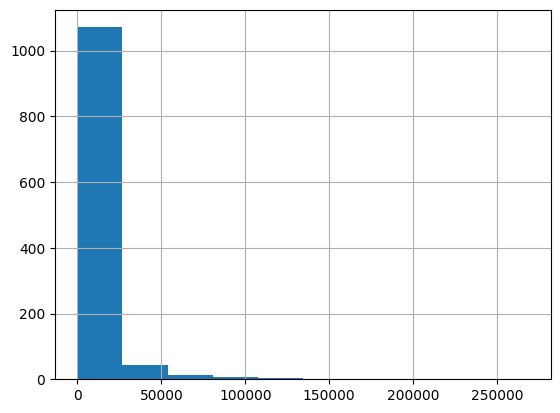

In [44]:
# Creamos un histograma del número de reviews
coursera_df.reviewcount.hist()

In [45]:
# Ahora ya podemos contestar a la pregunta
# ¿Cuál es el valor máximo de reviews? ¿Y en qué curso se encuentra?

# Calculamos el valor máximo
review_max = coursera_df.reviewcount.max()

# Vamos a mostrar el máximo de la columna reviewcount
print("El valor máximo de reviewcount es:", review_max)


course_top = coursera_df[coursera_df.reviewcount==review_max]['course'].values[0]

# Vamos a mostrar el máximo de la columna reviewcount
print(f"El curso con más reviews es {course_top} con {review_max}")

El valor máximo de reviewcount es: 268600
El curso con más reviews es Python for Everybody con 268600


In [46]:
# ¿Cuál es el valor mínimo de reviews? ¿Y en qué curso se encuentra?

# Calculamos el valor máximo
review_min = coursera_df.reviewcount.min()

# Vamos a mostrar el máximo de la columna reviewcount
print("El valor mínimo de reviewcount es:", review_min)


course_low = coursera_df[coursera_df.reviewcount==review_min]['course'].values[0]

# Vamos a mostrar el mínimo de la columna reviewcount
print(f"El curso con menos reviews es {course_low} con {review_min}")

El valor mínimo de reviewcount es: 6
El curso con menos reviews es Using Public Policy for Social Change con 6


In [47]:
# ¿Qué skill aparece más frequentemente en los cursos?
coursera_df.groupby("skills").course.count().sort_values(ascending=False).reset_index()

# Vemos que un curso tiene diferentes skills, esto se debería codificar diferente
# Cada skill debería estar por separado, no dentro de un diccionario en la tabla

,skills,course
0,"{""""}",19
1,"{"" Critical Thinking""}",8
2,"{"" Communication""}",8
3,"{"" Writing""}",8
4,"{"" Leadership and Management""}",5
...,...,...
972,"{"" Cryptography"","" Python Programming"","" Linux...",1
973,"{"" Cryptography"","" Security Software"","" Cybera...",1
974,"{"" Culture"","" Leadership and Management"","" Pro...",1
975,"{"" Customer Relationship Management"","" Sales"",...",1


In [48]:
# Primero de todo, limpiamos un poco el string
# Hay los símbolos { y } que no necesitamos
coursera_df.skills = coursera_df.skills.str.replace("{", "")
coursera_df.skills = coursera_df.skills.str.replace("}", "")

In [49]:
# Mostramos los datos de la columna sin "{" y "}"
coursera_df.skills

,skills
0,""" Network Security"","" Python Programming"","" Li..."
1,""" Data Analysis"","" R Programming"","" SQL"","" Bus..."
2,""" Project Management"","" Strategy and Operation..."
3,""" Digital Marketing"","" Marketing"","" Marketing ..."
4,""" Computer Networking"","" Network Architecture""..."
...,...
1134,NaN
1135,""" Strategy and Operations"","" Leadership and Ma..."
1136,""" Machine Learning"","" Python Programming"","" R ..."
1137,NaN


In [50]:
# A continuación, queremos considerar cada elemento separado, por lo tanto, usamos split
coursera_df.skills = coursera_df.skills.str.split(",")

# Mostramos las 2 primeras filas
coursera_df.skills.head(2)

,skills
0,"["" Network Security"", "" Python Programming"", ""..."
1,"["" Data Analysis"", "" R Programming"", "" SQL"", ""..."


In [51]:
# ¿Hay algun NaN?
print(f"Tenemos {coursera_df.skills.isna().sum()} NaNs")

# Remplazamos los NaNs por "None"
coursera_df.skills.fillna("None", inplace=True)

Tenemos 51 NaNs


/tmp/ipython-input-1680652547.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coursera_df.skills.fillna("None", inplace=True)


In [52]:
# Vemos que hay algunos espacios delante del texto que se deberían limpiar también

# Creamos una lista vacía donde pondremos los elementos
skills_mod = []
# Recorremos todas las filas del df
for n in range(coursera_df.shape[0]):
  # Guardamos la lista de skills de cada fila
  skill_list = coursera_df.skills[n]
  # Si la skill es None, podemos guardarlo directamente
  # e ir a la siguiente fila
  if skill_list == "None":
    skills_mod.append(skill_list)
    continue
  # Limpiamos espacios y '' de cada elemento de la lista
  skill_list_clean = [skill.replace('"', '').strip() for skill in skill_list]
  # Guardamos los elementos limpios en una nueva lista
  skills_mod.append(skill_list_clean)

In [53]:
# Para no perder la información inicial
# Creamos una nueva columna con los datos limpios
coursera_df['skills_mod'] = skills_mod

In [54]:
coursera_df['skills_mod']

,skills_mod
0,"[Network Security, Python Programming, Linux, ..."
1,"[Data Analysis, R Programming, SQL, Business C..."
2,"[Project Management, Strategy and Operations, ..."
3,"[Digital Marketing, Marketing, Marketing Manag..."
4,"[Computer Networking, Network Architecture, Ne..."
...,...
1134,None
1135,"[Strategy and Operations, Leadership and Manag..."
1136,"[Machine Learning, Python Programming, R Progr..."
1137,None


In [55]:
# Ahora ya podemos responder la pregunta
#¿Qué skill aparece más frequentemente en los cursos?

# Creamos una lista con todas las skills juntas
all_skills = []
for skills_list in coursera_df.skills_mod:
  #el operador * se usa para "desempaquetar" los elementos
  # de la lista y agregarlos individualmente a all_skills
  all_skills = [*all_skills, *skills_list]


In [56]:
# ¿Cuantas skills únicas hay?
print(f"El número único de skills es {len(set(all_skills))}")

El número único de skills es 436


In [57]:
# Importamos funciones del módulo collections
from collections import Counter, OrderedDict

# Usamos Counter para contar las veces que aparece cada elemento en la lista
element_counts = Counter(all_skills)
# Ordenamos los resultados con OrderedDict
# Y mostramos los 10 primeros
OrderedDict(element_counts.most_common(10))

OrderedDict([('Leadership and Management', 357),
             ('Data Analysis', 263),
             ('Computer Programming', 215),
             ('Strategy', 214),
             ('Communication', 211),
             ('Critical Thinking', 193),
             ('Problem Solving', 184),
             ('Strategy and Operations', 184),
             ('Python Programming', 170),
             ('Machine Learning', 153)])

In [58]:
# Buscamos skills que contengan el string sql
sql_related = [item for item in all_skills if "sql" in item.lower()]

# Usamos set() para sacar los valores únicos de la lista
print(f"Hay 3 skills relacionadas con SQL: {set(sql_related)}")

# ¿Qué skill aparece más?
Counter(sql_related)

Hay 3 skills relacionadas con SQL: {'PostgreSQL', 'NoSQL', 'SQL'}


Counter({'SQL': 93, 'NoSQL': 21, 'PostgreSQL': 13})

In [59]:
# ¿Los cursos con mayor duración tienen mejor puntuación? Correlaciona ambas variables

# Mostramos los valores de duration
print("Los valores de las puntuaciones son:\n", coursera_df.rating.unique())

# Mostramos los valores de duration
print("Los valores de la duración son:\n", coursera_df.duration.unique())

# No podemos hacer la correlación de arrays de string!
# Tenemos que transformar los datos a variables numéricas

Los valores de las puntuaciones son:
 [4.8 4.6 4.9 4.7 nan 4.5 4.4 4.  4.2 3.3 3.9 4.3 5.  2.8 3.7 3.2 2.9]
Los valores de la duración son:
 [' 3 - 6 Months' ' 1 - 3 Months' ' 1 - 4 Weeks' nan ' Less Than 2 Hours'
 ' 1 - 4 Years' ' 24 meses.' ' 24 meses' ' 26 meses' ' 4 meses' ' 6 meses'
 ' 4-6 months to complete' ' 4 months to complete' ' 4 months'
 ' 6-7 months to complete' ' 16 – 60 months' ' 24 - 60 months'
 ' 24 months' ' 6 - 12 Months' ' 15+ hours of study/wk per course'
 ' 2 years' ' 3 – 6 years' ' 12 months' ' 1 year' ' 24 to 60 months'
 ' 4 years' ' 1 – 3 years' ' 24 - 36 months' ' 18-24 Months'
 ' 2 to 4 years depending on beginning credits and course load'
 ' 3- 6 years' ' 1.5 – 3 years' ' 4-8 years' ' 2 – 3 years'
 ' 2 or 3 years' '  24 - 36 months' ' 18 a 24 meses']


In [60]:
# Cargamos la librería numpy
import numpy as np

# Función de conversión
# Vamos a usar el mes como unidad estándard
def convert_to_months(value):

  # Si es un NaN, devolvemos un NaN directamente
  if pd.isna(value):
      return np.nan

  # Ponemos los strings en minúscula
  value = value.lower().strip()

  # Conversión directa

  # Lo que sea una unidad pequeña lo ponemos como 0.1 para simplificar
  if 'hours' in value or 'less than' in value:
    return 0.1
  # Si son semanas, consideramos que un mes tiene 4 semanas, por lo tanto
  # 1 semana es 1/4 mes
  if 'weeks' in value:
    # Sabemos que el valor es el 1r elemento
    weeks = int(value.split()[0])
    return weeks / 4
  # Consideramos mes en inglés y español
  if 'months' in value or 'meses' in value:
    # Si hay 2 valores (cuando hay -) hacemos la media de los 2 valores
    nums = [int(s) for s in value.replace('-', ' ').replace('–', ' ').split() if s.isdigit()]
    return np.mean(nums) if nums else np.nan
  # Consideramos año en inglés y español
  if 'years' in value or 'años' in value or 'year' in value:
    # Si hay 2 valores (cuando hay -) hacemos la media de los 2 valores
    nums = [float(s.replace('–', '-')) for s in value.replace('-', ' ').split() if s.replace('.', '', 1).isdigit()]
    # Hacemos la transformación de año a mes, considerando que 1 año tiene 12 meses
    return np.mean(nums) * 12 if nums else np.nan

  # Rangos con guion sin espacios
  if '-' in value:
    # Había algunos elementos con guión pero sin espacio, se tienen que tratar por separado
    # pero la lógica es parecida
    nums = [float(s) for s in value.replace('–', '-').replace('months', '').replace('meses', '').split('-') if s.strip().isdigit()]
    return np.mean(nums) if nums else np.nan

  # Valor por defecto
  return np.nan

In [61]:
# Aplicamos la conversión al DataFrame
# Creamos un nuevo DataFrame para hacer comprobaciones antes
coursera_df['duration_in_Months'] = coursera_df['duration'].apply(convert_to_months)

# Mostramos resultados
print(coursera_df[['duration','duration_in_Months']].drop_duplicates())

                                               duration  duration_in_Months
0                                          3 - 6 Months                4.50
8                                          1 - 3 Months                2.00
10                                          1 - 4 Weeks                0.25
45                                                  NaN                 NaN
358                                   Less Than 2 Hours                0.10
1023                                        1 - 4 Years               30.00
1024                                          24 meses.               24.00
1025                                           24 meses               24.00
1026                                           26 meses               26.00
1028                                            4 meses                4.00
1032                                            6 meses                6.00
1033                             4-6 months to complete                5.00
1035        

In [62]:
# Para acabar solo nos queda sustituir el NaN por la media

# Calculamos la media de la columna
# Especificamos 1 decimal
media_duration= np.round(coursera_df.duration_in_Months.mean(),1)

print(f"La media de la columna duration_in_Months es {media_duration}")

# Rellenamos el NaN con el valor de la media
# Especificamos el inplace = True
coursera_df.duration_in_Months.fillna(media_duration, inplace=True)

La media de la columna duration_in_Months es 4.4


/tmp/ipython-input-822027900.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coursera_df.duration_in_Months.fillna(media_duration, inplace=True)


In [63]:
# Volvemos a mostrar resultados
print(coursera_df[['duration','duration_in_Months']].drop_duplicates())

                                               duration  duration_in_Months
0                                          3 - 6 Months                4.50
8                                          1 - 3 Months                2.00
10                                          1 - 4 Weeks                0.25
45                                                  NaN                4.40
358                                   Less Than 2 Hours                0.10
1023                                        1 - 4 Years               30.00
1024                                          24 meses.               24.00
1025                                           24 meses               24.00
1026                                           26 meses               26.00
1028                                            4 meses                4.00
1032                                            6 meses                6.00
1033                             4-6 months to complete                5.00
1035        

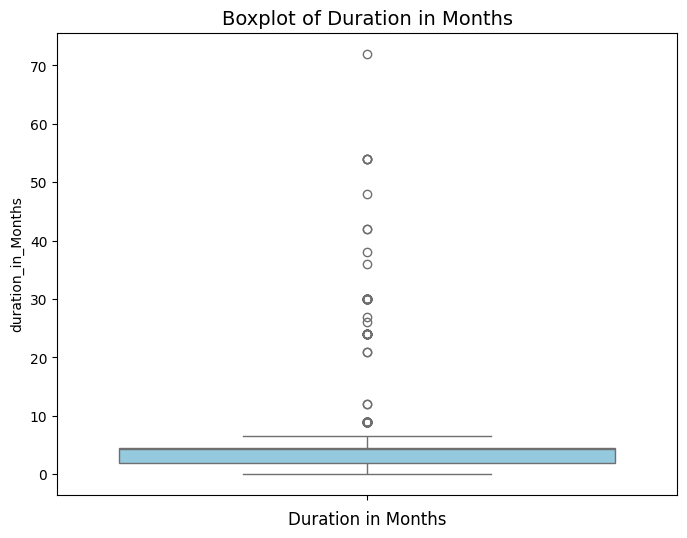

In [64]:
# Cargamos laa librerías de matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos y mostramos un boxplot de 'duration_in_Months'
plt.figure(figsize=(8, 6))
sns.boxplot(data=coursera_df, y='duration_in_Months', color='skyblue')
plt.title('Boxplot of Duration in Months', fontsize=14)
plt.xlabel('Duration in Months', fontsize=12)
plt.show()

In [65]:
# Miramos cuantos cursos hay por cada duración
coursera_df.groupby('duration_in_Months').course.count().sort_values(ascending=False)

,course
duration_in_Months,
4.50,451
2.00,333
0.25,207
9.00,40
30.00,26
4.40,23
24.00,16
4.00,11
0.10,10


In [66]:
# La columna de rating también tiene algun NaN que tenemos que sustituir por la media

# Calculamos la media de la columna
# Especificamos 1 decimal
media_rating= np.round(coursera_df.rating.mean(),1)

print(f"La media de la columna duration_in_Months es {media_rating}")

# Rellenamos el NaN con el valor de la media
# Especificamos el inplace = True
coursera_df.rating.fillna(media_rating, inplace=True)

La media de la columna duration_in_Months es 4.7


/tmp/ipython-input-1888617456.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coursera_df.rating.fillna(media_rating, inplace=True)


In [67]:
# Miramos cuantos cursos hay por cada rating
coursera_df.groupby('rating').course.count().sort_values(ascending=False)

,course
rating,
4.7,444
4.8,292
4.6,170
4.5,78
4.9,78
4.4,39
4.3,11
4.2,9
3.9,5


In [68]:
# Las 2 columnas están bien ahora
print(coursera_df[['rating','duration_in_Months']].isna().sum())
print(coursera_df[['rating','duration_in_Months']].info())

rating                0
duration_in_Months    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              1139 non-null   float64
 1   duration_in_Months  1139 non-null   float64
dtypes: float64(2)
memory usage: 17.9 KB
None


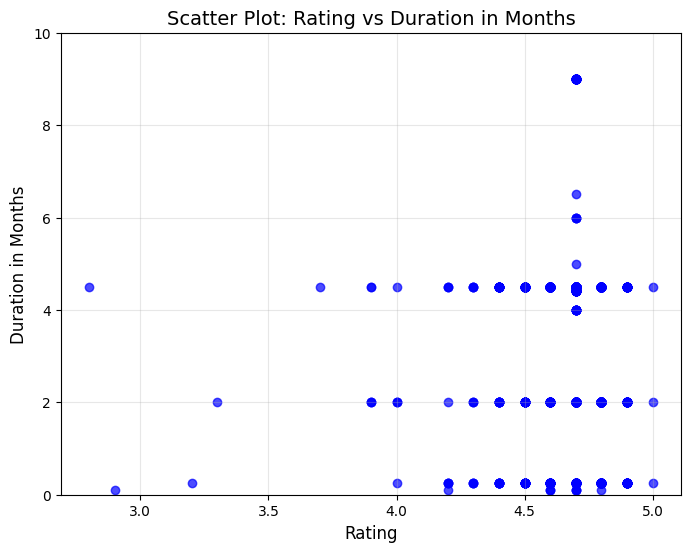

In [69]:
# Cargamos la librería de matplotlib
import matplotlib.pyplot as plt

# Creamos el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(coursera_df['rating'], coursera_df['duration_in_Months'], alpha=0.7, color='blue')
plt.title('Scatter Plot: Rating vs Duration in Months', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Duration in Months', fontsize=12)
plt.ylim(0,10)
plt.grid(alpha=0.3)
plt.show()

In [70]:
# Calculamos la correlación entre 'rating' y 'duration_in_Months'
correlation = coursera_df[['rating', 'duration_in_Months']].corr()

# Mostramos la matriz de correlación
print(correlation.rating)

rating                1.000000
duration_in_Months    0.015434
Name: rating, dtype: float64
